# Diabetes prediction with linear regression and Gradient Descent

In [22]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline 

In [23]:
#Importing dataset 
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()

In [24]:
print(diabetes_data.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [25]:
print(diabetes_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [26]:
diabetes = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [27]:
diabetes["DiseaseProgression"] = diabetes_data.target

In [28]:
#To find missing values
diabetes.isnull().sum()

age                   0
sex                   0
bmi                   0
bp                    0
s1                    0
s2                    0
s3                    0
s4                    0
s5                    0
s6                    0
DiseaseProgression    0
dtype: int64

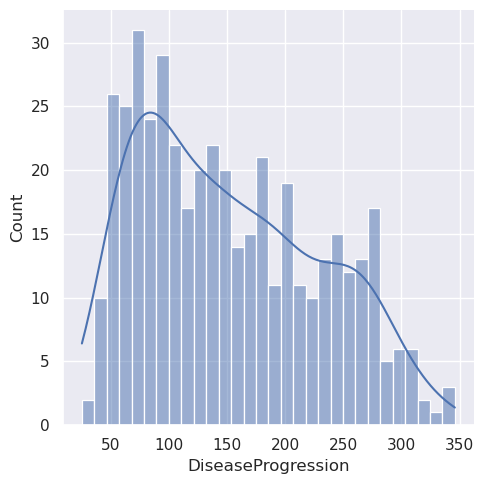

In [29]:
# Set figure size
sns.set(rc={'figure.figsize':(11.7, 8.27)})
# Plot distribution with displot
sns.displot(diabetes["DiseaseProgression"], bins=30, kde=True)
plt.show()

<Axes: >

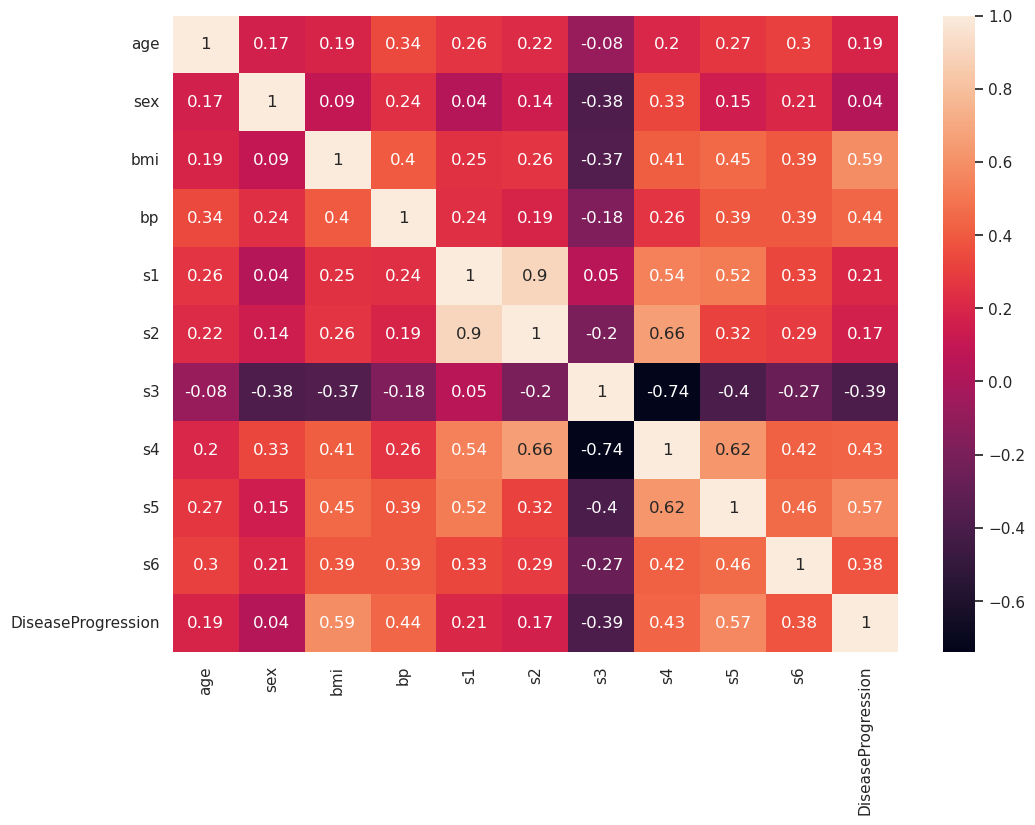

In [30]:
correlation_matrix = diabetes.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

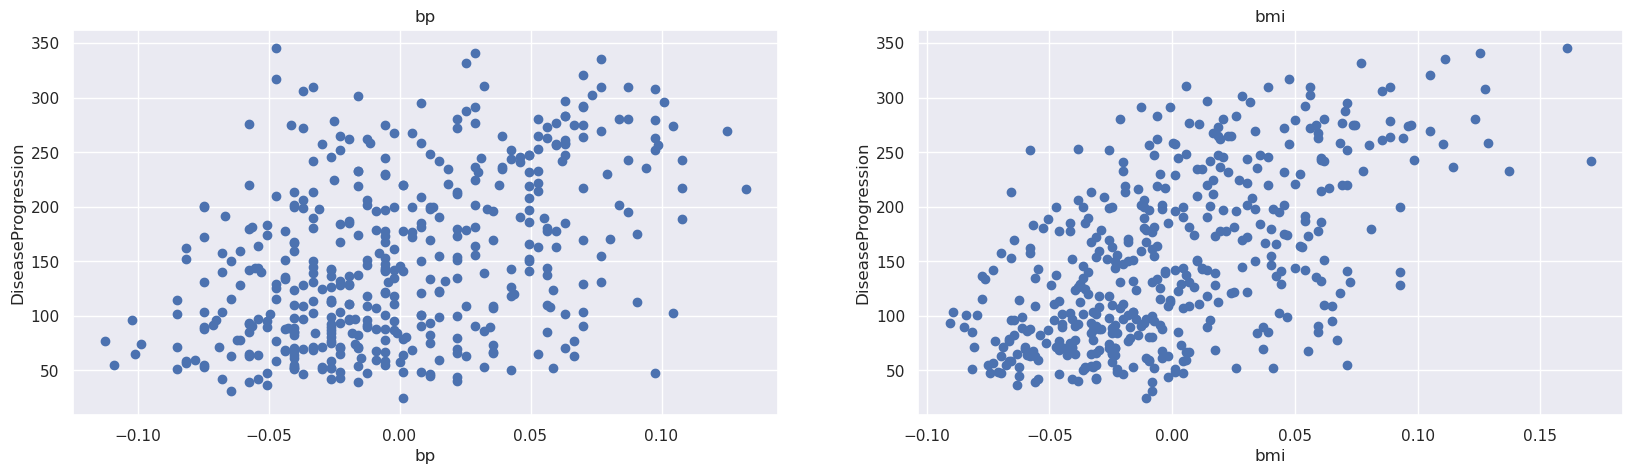

In [31]:
plt.figure(figsize=(20, 5))

features = ['bp', 'bmi']
target = diabetes['DiseaseProgression']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = diabetes[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('DiseaseProgression')

In [32]:
X = pd.DataFrame(np.c_[diabetes['bp'], diabetes['bmi']], columns = ['LSTAT','RM'])
Y = diabetes['DiseaseProgression']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(353, 2)
(89, 2)
(353,)
(89,)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [35]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 58.84208904892203
R2 score is 0.40555424766887505


The model performance for testing set
--------------------------------------
RMSE is 63.717756189456225
R2 score is 0.3561400725324545


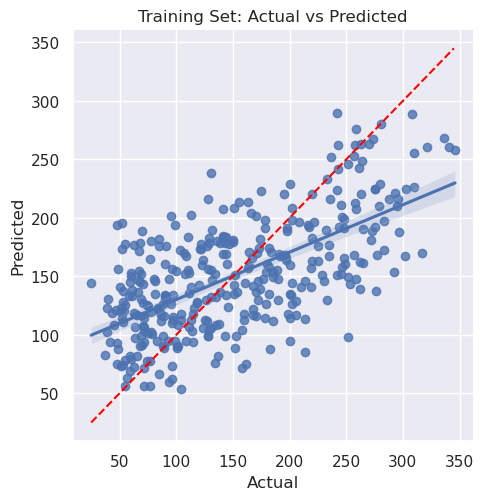

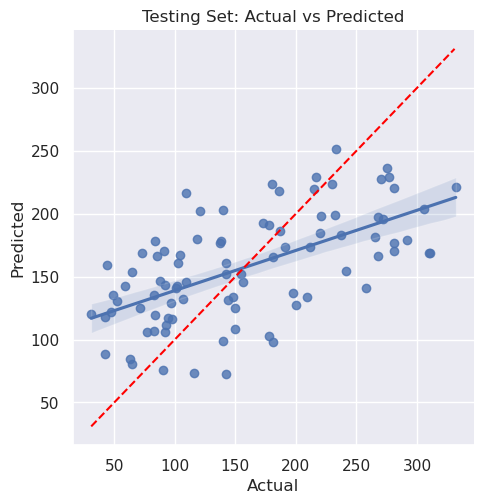

In [36]:
# Create DataFrame for plotting
df_train_results = pd.DataFrame({
    'Actual': Y_train,
    'Predicted': y_train_predict.flatten()  # Ensure y_train_predict is a 1D array
})

df_test_results = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': y_test_predict.flatten()  # Ensure y_test_predict is a 1D array
})

# Plot for Training Set
sns.lmplot(x='Actual', y='Predicted', data=df_train_results, fit_reg=True)
d_line = np.arange(df_train_results.min().min(), df_train_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Plot for Testing Set
sns.lmplot(x='Actual', y='Predicted', data=df_test_results, fit_reg=True)
d_line = np.arange(df_test_results.min().min(), df_test_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()